In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_29163/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('../versions/keypoints_xyz_0.9_v3.csv')

In [3]:
df.head()

,label,keypoints
0,A,"[(0.35990989208221436, 0.8417818546295166, -6...."
1,A,"[(0.6427100896835327, 0.5379325151443481, -4.7..."
2,A,"[(0.7046040892601013, 0.8876957893371582, -3.9..."
3,A,"[(0.6484864950180054, 0.902927041053772, -6.27..."
4,A,"[(0.6400114893913269, 0.5368986129760742, -5.1..."


In [4]:
df['keypoints'] = df['keypoints'].apply(eval)
df['keypoints'] = df['keypoints'].apply(lambda x: [tuple(val[:2]) for val in x])

df.head()

,label,keypoints
0,A,"[(0.35990989208221436, 0.8417818546295166), (0..."
1,A,"[(0.6427100896835327, 0.5379325151443481), (0...."
2,A,"[(0.7046040892601013, 0.8876957893371582), (0...."
3,A,"[(0.6484864950180054, 0.902927041053772), (0.7..."
4,A,"[(0.6400114893913269, 0.5368986129760742), (0...."


In [5]:
def calculate_angle(a, b, c):
    a = np.array(a)  # Coordonnées du premier point
    b = np.array(b)  # Coordonnées du point de pivot
    c = np.array(c)  # Coordonnées du troisième point
    # Vecteurs de a à b et de c à b
    ab = a - b
    cb = c - b
    # Produit scalaire des vecteurs ab et cb
    dot_product = np.dot(ab, cb)
    # Normes (longueurs) des vecteurs ab et cb
    norm_ab = np.linalg.norm(ab)
    norm_cb = np.linalg.norm(cb)
    # Calcul de l'angle en radians entre les deux vecteurs
    angle = np.arccos(dot_product / (norm_ab * norm_cb))
    # Conversion de l'angle en degrés
    angle_deg = np.degrees(angle)
    return angle_deg

In [6]:
joint_list = [[4,1], [8,5], [12,9], [16,13], [20,17]]

In [7]:
all_angles = []
for _, row in df.iterrows():
    keypoints = row['keypoints']
    angles = []
    for joint in joint_list:
        a = (keypoints[0][0:2])
        b = (keypoints[joint[1]][0:2])
        c = (keypoints[joint[0]][0:2])
        angle = calculate_angle(a, b, c)
        angles.append(angle)
    all_angles.append(angles)
df['angles'] = all_angles

In [8]:
for i in range(len(joint_list)):
    df[f'angle_{i}'] = [angles[i] for angles in all_angles]

In [9]:
df.head()

,label,keypoints,angles,angle_0,angle_1,angle_2,angle_3,angle_4
0,A,"[(0.35990989208221436, 0.8417818546295166), (0...","[133.18999536221054, 12.724865061142042, 8.980...",133.189995,12.724865,8.980182,0.094990,7.892518
1,A,"[(0.6427100896835327, 0.5379325151443481), (0....","[137.1568149458273, 37.75719376438215, 25.3133...",137.156815,37.757194,25.313397,14.189645,11.452950
2,A,"[(0.7046040892601013, 0.8876957893371582), (0....","[126.55433747949573, 27.77845161924259, 20.169...",126.554337,27.778452,20.169412,11.572620,2.557494
3,A,"[(0.6484864950180054, 0.902927041053772), (0.7...","[130.8469992424428, 18.963555617323, 14.055457...",130.846999,18.963556,14.055458,5.324349,0.022189
4,A,"[(0.6400114893913269, 0.5368986129760742), (0....","[136.70791965940188, 28.889023872866524, 20.58...",136.707920,28.889024,20.584195,11.884545,6.790170


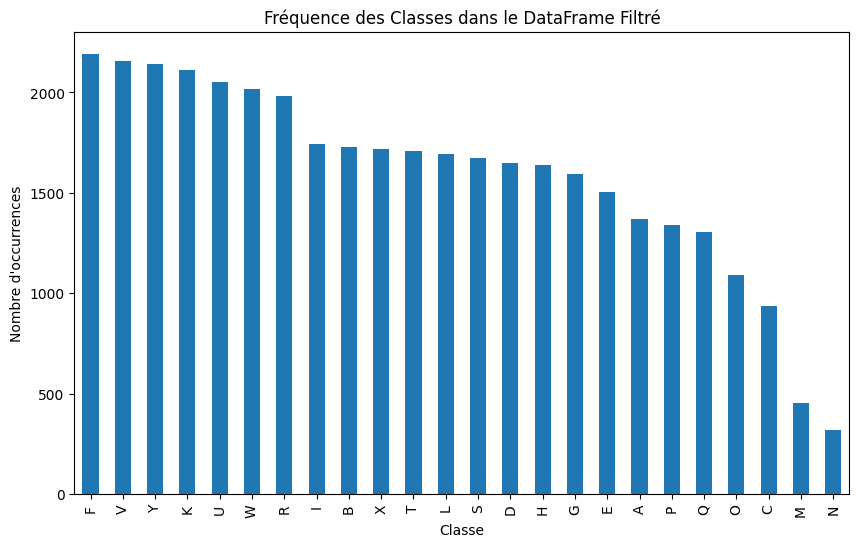

In [10]:
class_counts_filtered = df['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts_filtered.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.title('Fréquence des Classes dans le DataFrame Filtré')
plt.show()

In [11]:
seuil_bas = 100
seuil_haut = 300

classes_to_keep = class_counts_filtered[class_counts_filtered >= seuil_bas].index
df_filtered = pd.DataFrame(columns=df.columns)
for classe in classes_to_keep:
    df_classe = df[df['label'] == classe]
    if len(df_classe) > seuil_haut:
        df_classe = df_classe.head(seuil_haut)
    df_filtered = pd.concat([df_filtered, df_classe], ignore_index=True)

/tmp/ipykernel_29163/1498529374.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_filtered = pd.concat([df_filtered, df_classe], ignore_index=True)


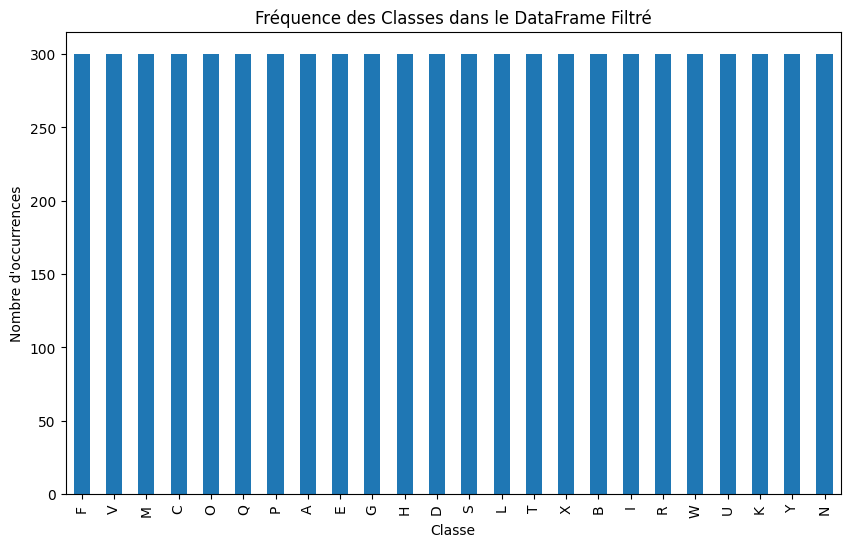

In [12]:
class_counts_filtered = df_filtered['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts_filtered.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.title('Fréquence des Classes dans le DataFrame Filtré')
plt.show()

In [13]:
df_filtered.head()

,label,keypoints,angles,angle_0,angle_1,angle_2,angle_3,angle_4
0,F,"[(0.7513758540153503, 0.8790234327316284), (0....","[144.61438004898852, 122.36613315522479, 135.6...",144.614380,122.366133,135.605689,150.171079,163.181942
1,F,"[(0.5941231846809387, 0.8328999280929565), (0....","[149.28061803960802, 135.31603175736112, 150.1...",149.280618,135.316032,150.156606,155.202697,161.852773
2,F,"[(0.41536805033683777, 0.9190069437026978), (0...","[134.44926791727485, 160.91186799190382, 168.1...",134.449268,160.911868,168.106471,170.612896,168.752822
3,F,"[(0.45164239406585693, 0.7461936473846436), (0...","[153.2767325225231, 116.0345227550705, 136.476...",153.276733,116.034523,136.476166,149.494742,170.311560
4,F,"[(0.6129147410392761, 0.8815302848815918), (0....","[144.8773012871197, 133.92803088423116, 149.07...",144.877301,133.928031,149.072546,156.120576,162.814845


In [14]:
df_filtered = df_filtered.drop(columns=['angles'])
df_filtered.head()

,label,keypoints,angle_0,angle_1,angle_2,angle_3,angle_4
0,F,"[(0.7513758540153503, 0.8790234327316284), (0....",144.614380,122.366133,135.605689,150.171079,163.181942
1,F,"[(0.5941231846809387, 0.8328999280929565), (0....",149.280618,135.316032,150.156606,155.202697,161.852773
2,F,"[(0.41536805033683777, 0.9190069437026978), (0...",134.449268,160.911868,168.106471,170.612896,168.752822
3,F,"[(0.45164239406585693, 0.7461936473846436), (0...",153.276733,116.034523,136.476166,149.494742,170.311560
4,F,"[(0.6129147410392761, 0.8815302848815918), (0....",144.877301,133.928031,149.072546,156.120576,162.814845


In [18]:
keypoints_indices = [0, 4, 8, 12, 16, 20]
for i, index in enumerate(keypoints_indices):
    df_filtered[f'x_{index}'] = df_filtered['keypoints'].apply(lambda x: x[i][0] if isinstance(x, list) and len(x) > i and isinstance(x[i], tuple) else None)
    df_filtered[f'y_{index}'] = df_filtered['keypoints'].apply(lambda x: x[i][1] if isinstance(x, list) and len(x) > i and isinstance(x[i], tuple) else None)
df_filtered = df_filtered.drop(columns=['keypoints'])
df_filtered.head()


,label,angle_0,angle_1,angle_2,angle_3,angle_4,x_0,y_0,x_4,y_4,x_8,y_8,x_12,y_12,x_16,y_16,x_20,y_20
0,F,144.614380,122.366133,135.605689,150.171079,163.181942,0.751376,0.879023,0.837563,0.854544,0.910310,0.805585,0.952931,0.745388,0.975084,0.683247,0.840357,0.688963
1,F,149.280618,135.316032,150.156606,155.202697,161.852773,0.594123,0.832900,0.694937,0.719029,0.754912,0.607391,0.766419,0.499853,0.755313,0.402530,0.595633,0.526637
2,F,134.449268,160.911868,168.106471,170.612896,168.752822,0.415368,0.919007,0.507513,0.839362,0.574404,0.730397,0.566917,0.630532,0.525340,0.556893,0.468008,0.634831
3,F,153.276733,116.034523,136.476166,149.494742,170.311560,0.451642,0.746194,0.534322,0.660439,0.588812,0.558131,0.610844,0.465351,0.621282,0.380052,0.430534,0.462264
4,F,144.877301,133.928031,149.072546,156.120576,162.814845,0.612915,0.881530,0.735889,0.783587,0.823305,0.665116,0.847019,0.539681,0.839984,0.428569,0.645893,0.544024


In [19]:
X = df_filtered.drop(columns=['label'])
y = df_filtered['label']

In [20]:
X.head()

,angle_0,angle_1,angle_2,angle_3,angle_4,x_0,y_0,x_4,y_4,x_8,y_8,x_12,y_12,x_16,y_16,x_20,y_20
0,144.614380,122.366133,135.605689,150.171079,163.181942,0.751376,0.879023,0.837563,0.854544,0.910310,0.805585,0.952931,0.745388,0.975084,0.683247,0.840357,0.688963
1,149.280618,135.316032,150.156606,155.202697,161.852773,0.594123,0.832900,0.694937,0.719029,0.754912,0.607391,0.766419,0.499853,0.755313,0.402530,0.595633,0.526637
2,134.449268,160.911868,168.106471,170.612896,168.752822,0.415368,0.919007,0.507513,0.839362,0.574404,0.730397,0.566917,0.630532,0.525340,0.556893,0.468008,0.634831
3,153.276733,116.034523,136.476166,149.494742,170.311560,0.451642,0.746194,0.534322,0.660439,0.588812,0.558131,0.610844,0.465351,0.621282,0.380052,0.430534,0.462264
4,144.877301,133.928031,149.072546,156.120576,162.814845,0.612915,0.881530,0.735889,0.783587,0.823305,0.665116,0.847019,0.539681,0.839984,0.428569,0.645893,0.544024


In [21]:
X.shape, y.shape

((7200, 17), (7200,))

In [22]:
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

import xgboost as xgb

import joblib

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5) 
    print(f"Model: {type(model).__name__}")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean score: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")

/home/mathieu/Dev/project/asl_web_app/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mathieu/Dev/project/asl_web_app/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Model: LogisticRegression
Cross-validation scores: [0.7734375  0.75868056 0.75260417 0.74913194 0.75520833]
Mean score: 0.7578125000000001
Standard deviation: 0.008416110863570024
Model: DecisionTreeClassifier
Cross-validation scores: [0.88975694 0.91666667 0.890625   0.88715278 0.90451389]
Mean score: 0.8977430555555556
Standard deviation: 0.011229834464441807
Model: RandomForestClassifier
Cross-validation scores: [0.9609375  0.96961806 0.96527778 0.95399306 0.96006944]
Mean score: 0.9619791666666668
Standard deviation: 0.005248686270080202
Model: SVC
Cross-validation scores: [0.82118056 0.83940972 0.83246528 0.84114583 0.84635417]
Mean score: 0.836111111111111
Standard deviation: 0.00868749722444221
Model: KNeighborsClassifier
Cross-validation scores: [0.890625   0.91059028 0.90017361 0.89583333 0.90451389]
Mean score: 0.9003472222222222
Standard deviation: 0.006887789730860191


In [25]:
model_xgb = xgb.XGBClassifier()
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

scores = cross_val_score(model_xgb, X_train, y_train_encoded, cv=5)

print(f"Model: {type(model_xgb).__name__}")
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

Model: XGBClassifier
Cross-validation scores: [0.95920139 0.96961806 0.96180556 0.94704861 0.95572917]
Mean score: 0.9586805555555555
Standard deviation: 0.0073983596363411475


In [41]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an instance of the XGBClassifier model
model = xgb.XGBClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train_encoded)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best score: 0.920138888888889


In [26]:
model_xgb = xgb.XGBClassifier()
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

param_grid = {
    'max_depth': 7,
    'learning_rate': 0.1,
    'n_estimators': 300,
    'gamma': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 1.0
}

model_xgb.set_params(**param_grid)
model_xgb.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
y_pred = model_xgb.predict(X_test)
report = classification_report(y_test_encoded, y_pred)
cm = confusion_matrix(y_test_encoded, y_pred)
print("Rapport de classification :")
print(report)

Rapport de classification :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.98      1.00      0.99        64
           2       1.00      0.98      0.99        52
           3       0.98      0.98      0.98        53
           4       0.96      0.85      0.90        60
           5       0.98      1.00      0.99        64
           6       0.98      1.00      0.99        65
           7       0.98      0.98      0.98        57
           8       0.95      0.98      0.97        61
           9       0.98      0.95      0.97        65
          10       0.98      0.91      0.94        56
          11       0.83      0.89      0.86        61
          12       0.85      0.83      0.84        47
          13       0.94      1.00      0.97        78
          14       0.92      0.97      0.94        62
          15       0.92      0.92      0.92        59
          16       0.98      0.96      0.97        46

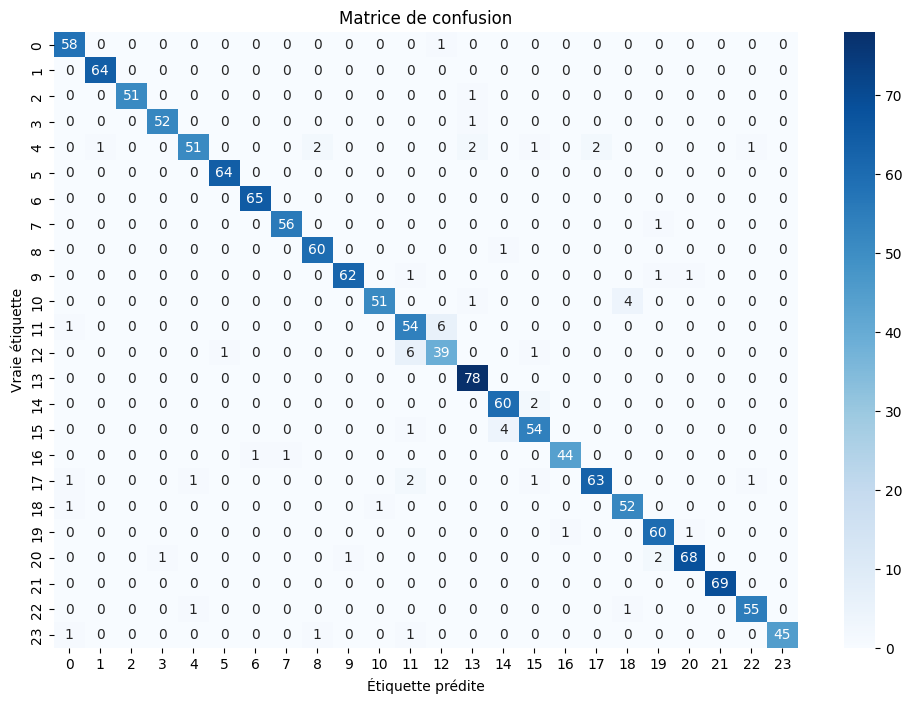

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.title('Matrice de confusion')
plt.show()

In [29]:
joblib.dump(model_xgb, 'model_xgb_xyz_angles_only_v1.pkl')

['model_xgb_xyz_angles_only_v1.pkl']